In [1]:
import pandas as pd
from graph_tool.all import *

In [39]:
# This section of the code is taken from insights.ipynb file. 
df = pd.read_csv('sample_set.csv',usecols=['link_id','subreddit','subreddit_id'])
df.head()
df_by_subreddit = df.groupby(['subreddit'])
df_per_subreddit = pd.DataFrame()
#print(df_by_subreddit[].count())
df_per_subreddit['posts_per_subreddit'] = df_by_subreddit['link_id'].count()
df_per_subreddit['subreddit'] = df_per_subreddit.index.map(lambda x : x[0])
df_per_subreddit['link_id'] = df_per_subreddit.index.map(lambda x : x[1])
#df_per_subreddit
df_new = df_by_subreddit.get_group("DNMAvengers")
df_by_subreddit.groups.keys()

dict_keys(['ApplyStarWarsRP', 'CrappyStarWars', 'DNMAvengers', 'ImaginaryJedi', 'JediBytes', 'Marvel', 'MarvelCoC', 'MarvelLegends', 'MarvelPuzzleQuest', 'NewMarvelRp', 'StarWars', 'StarWarsArmada', 'StarWarsBattlefront', 'StarWarsDadJokes', 'StarWarsEU', 'StarWarsEmpireAtWar', 'StarWarsFigures', 'StarWarsLCG', 'StarWarsLeaks', 'StarWarsMinute', 'StarWarsRPMeta', 'StarWarsRebels2', 'StarWarsShips', 'StarWarsTFA', 'StarWarsTheories', 'StarWarsUprising', 'Starwarsheroes', 'Starwarsrp', 'StarwarstraderRL', 'jediknight', 'legendarymarvel', 'legostarwars', 'legostarwars2', 'marvelcomics', 'marvelfans', 'marvelheroes', 'marvelmemes', 'marvelstudios', 'starwarsbooks', 'starwarscollectibles', 'starwarscollecting', 'starwarscomics', 'starwarscosplay', 'starwarsnsfw', 'starwarsrebels', 'starwarsspeculation', 'starwarstrader'])

In [40]:
#df_new['link_id'].value_counts():
    #print(i)
    
def create_subgraph(g,parent_node,v_prop,e_prop,df_grouped,col='link_id'):
    temp = df_grouped[col].value_counts()
    print("{}".format(len(temp)))
    for link,freq in temp.items():
        # Set vertex properties
        t = g.add_vertex()
        v_prop[t] = link
        # Set edge properties
        et = g.add_edge(parent_node,t)
        e_prop[et] = freq
    return g

In [41]:
def create_parent_graph(g,v_prop,v_name):
    vertex = g.add_vertex()
    v_prop[vertex] = v_name
    return g,vertex

## Graphical Analyis: Level 1
We divide the sample into subreddits and try to analyse the number of links we have for every subreddit. 
* Below we have an example illustrating two subreddits: DNMAvengers and ImaginaryJedi . 
* An important point here is the thickness of the edges, which denote the number of posts in each of the links. 
* for example, DNMAvengers have a total of 8 posts out of which 6 of them have been posted under link_id: "t3_3wjsyi"

DNMAvengers --> 3
ImaginaryJedi --> 4


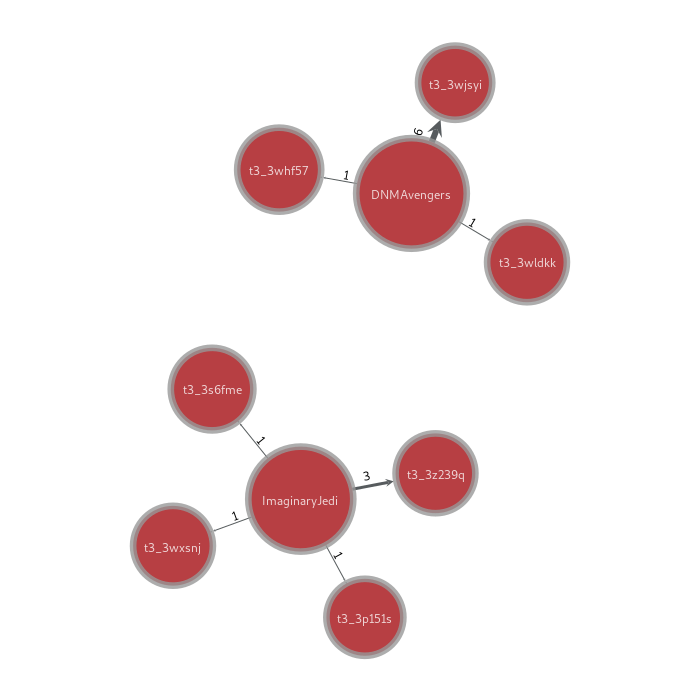

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fee89cef4a8, at 0x7fee89cefda0>

In [42]:
# To be initialized at the start of the graph
g = Graph(directed=True)
v_prop = g.new_vertex_property("string")
e_prop = g.new_edge_property("int")

for subs in list(df_by_subreddit.groups.keys())[2:4]:
    df = df_by_subreddit.get_group(subs)
    print("{} -->".format(subs),end=" ")
    g,v = create_parent_graph(g,v_prop,subs)
    g = create_subgraph(g,v,v_prop,e_prop,df)

graph_draw(g,vertex_text=v_prop, edge_text=e_prop, edge_pen_width= e_prop,output_size=(700,700))
#graph_draw(g)
#g.save("mygraph.xml.gz")

## Graphical Analyis: Level 2
Now, we take a larger sample of the dataset and try to see how the graph looks. 
* A larger dataset definitely produces a dense graph, with several nodal clusters of different size.
* Each cluster belongs to a subreddit and the size of the cluster represents the popularity of the subreddit.
* For example, below we see "StarWars" is the most popular sureddit with the highest number of posts. 
* Please note, it may be difficult to analyse the edge level granularity with a graph so densly populated. 

ApplyStarWarsRP --> 1
CrappyStarWars --> 1
DNMAvengers --> 3
ImaginaryJedi --> 4
JediBytes --> 1
Marvel --> 22
MarvelCoC --> 1
MarvelLegends --> 3
MarvelPuzzleQuest --> 1
NewMarvelRp --> 3
StarWars --> 167
StarWarsArmada --> 3
StarWarsBattlefront --> 91
StarWarsDadJokes --> 2
StarWarsEU --> 11
StarWarsEmpireAtWar --> 1
StarWarsFigures --> 1
StarWarsLCG --> 2
StarWarsLeaks --> 44
StarWarsMinute --> 1
StarWarsRPMeta --> 1
StarWarsRebels2 --> 1
StarWarsShips --> 1
StarWarsTFA --> 4
StarWarsTheories --> 1
StarWarsUprising --> 4
Starwarsheroes --> 2
Starwarsrp --> 1
StarwarstraderRL --> 1
jediknight --> 1
legendarymarvel --> 2
legostarwars --> 3
legostarwars2 --> 1
marvelcomics --> 2
marvelfans --> 1
marvelheroes --> 2
marvelmemes --> 2
marvelstudios --> 31
starwarsbooks --> 1
starwarscollectibles --> 2
starwarscollecting --> 4
starwarscomics --> 3
starwarscosplay --> 1
starwarsnsfw --> 7
starwarsrebels --> 4
starwarsspeculation --> 35
starwarstrader --> 10


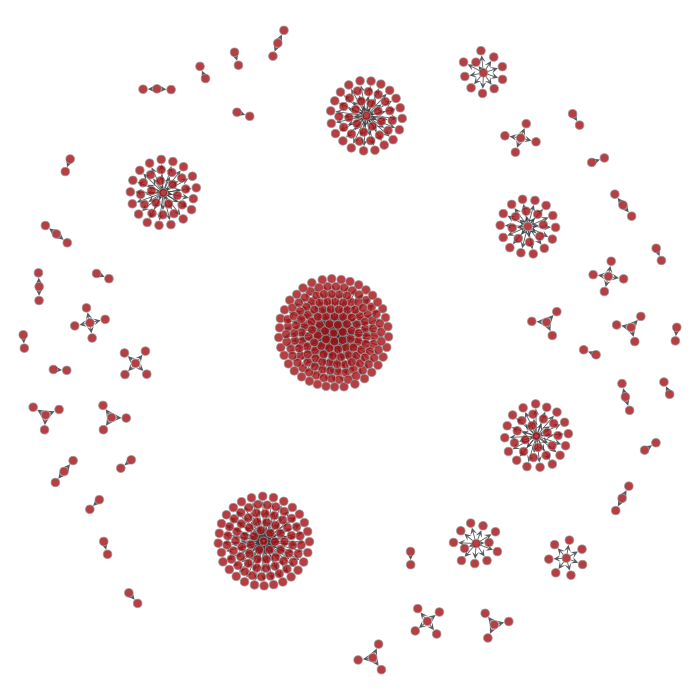

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fee89cee6a0, at 0x7fee89d54438>

In [38]:
# To be initialized at the start of the graph
g = Graph(directed=True)
v_prop = g.new_vertex_property("string")
e_prop = g.new_edge_property("int")

for subs in df_by_subreddit.groups.keys():
    df = df_by_subreddit.get_group(subs)
    print("{} -->".format(subs),end=" ")
    g,v = create_parent_graph(g,v_prop,subs)
    g = create_subgraph(g,v,v_prop,e_prop,df)
#graph_draw(g,vertex_text=v_prop, edge_text=e_prop, edge_pen_width= e_prop,vertex_font_size=18)
graph_draw(g,output_size=(700,700))